In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import project_path

In [3]:
import glob
import os

from pathlib import Path
from itertools import product

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from src.plotting import make_result_heatmap, add_lines, make_benchmark_heatmap

In [4]:
pd.read_csv('../experiments.csv')

,id,Type of experiment
0,0,Local experiments
1,1587919855,p vs q algorithms for SBM with 50 cuts
2,1587918440,p vs q algorithms for SBM with 50 cuts for 4 ...
3,1587804052,p vs q algorithms for SBM with 50 cuts for 5 ...
4,1587703699,KnnBlobs experiments with different k and 50 ...
5,1586946592,SBM experiments
6,1587621343,KnnBlobs with 100 cuts testing different a
7,1587629564,KL vs MF algorithms on SBM
8,1587632158,SBM with fixed p and q and different numbers ...
9,1587632375,KnnBlobs with fixed k and different numbers o...


In [12]:
experiment_id = '1590579968'

In [13]:
path_in = Path(f'../output/{experiment_id}').resolve()
path_temp = Path(f'/tmp/{experiment_id}.csv').resolve()
path_out = Path(f'../plots/benchmark').resolve()
path_out.mkdir(parents=True, exist_ok=True)

In [14]:
is_first_file = True
with open(path_temp,"wb") as output_file:
    for subdir, dirs, files in os.walk(path_in):
        for file in files:
            input_path = f'{subdir}/{file}'
            if is_first_file:
                is_first_file = False
                with open(input_path, "rb") as input_file:
                    output_file.write(input_file.read())
            else:
                with open(input_path, "rb") as input_file:
                    next(input_file)
                    output_file.write(input_file.read())

In [22]:
experiment_df = pd.read_csv(path_temp, index_col=0).reset_index(drop=True)
experiment_df

,seed,dataset_name,preprocessing_name,agreement,percentile_orders,unique_id,dataset_type,block_sizes,p,q,nb_cuts,lb_f,Adjusted Rand Score
0,70,sbm,fid_mat,50,100,1590579968,graph,"[100, 100]",0.92,0.51,50,0.2,0.000000
1,100,sbm,fid_mat,50,100,1590579968,graph,"[100, 100]",0.92,0.78,50,0.2,0.000000
2,100,sbm,fid_mat,50,100,1590579968,graph,"[100, 100]",0.23,0.64,50,0.3,-0.000185
3,40,sbm,fid_mat,50,100,1590579968,graph,"[100, 100]",0.55,0.78,50,0.3,0.000000
4,60,sbm,fid_mat,50,100,1590579968,graph,"[100, 100]",0.14,0.69,50,0.2,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11982,80,sbm,fid_mat,50,100,1590579968,graph,"[100, 100]",0.74,0.51,50,0.3,0.358447
11983,50,sbm,fid_mat,50,100,1590579968,graph,"[100, 100]",0.83,0.28,50,0.2,1.000000
11984,60,sbm,fid_mat,50,100,1590579968,graph,"[100, 100]",0.28,0.69,50,0.3,0.000006
11985,50,sbm,fid_mat,50,100,1590579968,graph,"[100, 100]",0.32,0.60,50,0.3,0.000006


In [23]:
df = experiment_df[experiment_df['lb_f'] == 0.4].reset_index(drop=True)
df

,seed,dataset_name,preprocessing_name,agreement,percentile_orders,unique_id,dataset_type,block_sizes,p,q,nb_cuts,lb_f,Adjusted Rand Score
0,100,sbm,fid_mat,50,100,1590579968,graph,"[100, 100]",0.41,0.69,50,0.4,-0.006551
1,50,sbm,fid_mat,50,100,1590579968,graph,"[100, 100]",0.83,0.09,50,0.4,1.000000
2,10,sbm,fid_mat,50,100,1590579968,graph,"[100, 100]",0.09,0.87,50,0.4,-0.006553
3,40,sbm,fid_mat,50,100,1590579968,graph,"[100, 100]",0.37,0.55,50,0.4,-0.000915
4,30,sbm,fid_mat,50,100,1590579968,graph,"[100, 100]",0.87,0.32,50,0.4,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3986,100,sbm,fid_mat,50,100,1590579968,graph,"[100, 100]",0.46,0.64,50,0.4,-0.005343
3987,60,sbm,fid_mat,50,100,1590579968,graph,"[100, 100]",0.74,0.18,50,0.4,1.000000
3988,50,sbm,fid_mat,50,100,1590579968,graph,"[100, 100]",0.09,0.46,50,0.4,-0.004393
3989,90,sbm,fid_mat,50,100,1590579968,graph,"[100, 100]",0.74,0.18,50,0.4,1.000000


In [24]:
sc_df = pd.read_csv(f'SpectralClustering.csv')
sc_df = sc_df.rename(columns={"score": "Adjusted Rand Score"})

In [25]:
columns = ['p', 'q', 'Adjusted Rand Score']
exp_df = df[columns].groupby(['p', 'q'], as_index=False).mean()
ref_df = sc_df[columns].groupby(['p', 'q'], as_index=False).mean()

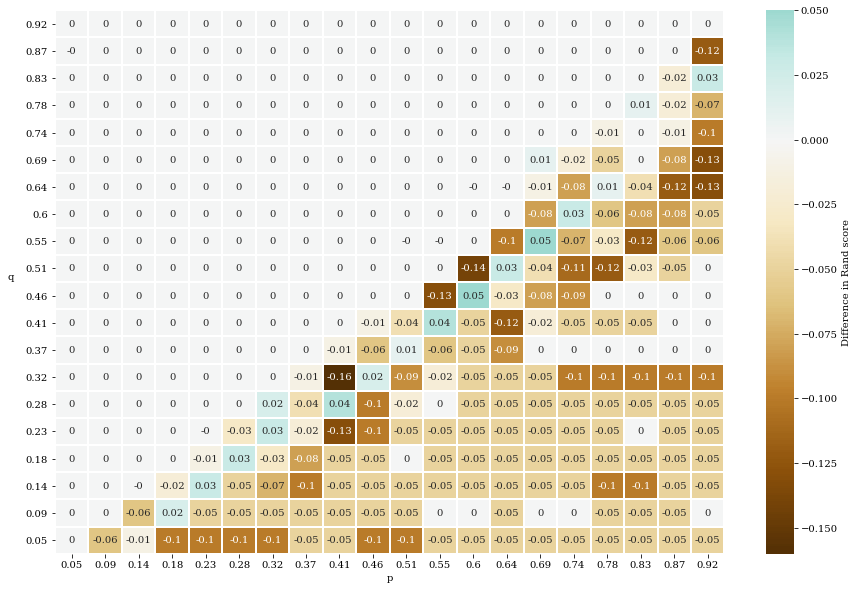

In [26]:
fig, ax = make_benchmark_heatmap(exp_df, ref_df, x_column=columns[0], y_column=columns[1], values_column=columns[2])

In [12]:
fig.savefig('benchmark.svg')